## Collaborative filtering

### 1. Neighborhood based (Memory based)
- UserCF
- ItemCF

### 2. Model based
#### 2.1 Laten Factor Model (LFM)
- a. factors are related to users' preference and products which are based on auto clustering
- b. ranged in numbers of laten factors and detailedness 
##### 2.1.1 Matrix Factorization
- a. Matrix (NxM) -> User_matrix x  item_matrix  

- $ User\_matrix = [x_1, x_2, x_3, x_4, ... x_n] $
- $ Item\_matrix = [y_1, y_2, y_3, ....., y_n] $
- $ \min_{x,y}\sum(r_{ui}- x_u^Ty_i)^2+ \lambda(\sum_u ||x_u||_2^2 + \sum||y_i||_2^2) $ (prevent overfitting)
##### 2.1.2 LDA LSA pLSA
#### 2.2 Bayes' theorem network
#### 2.3 SVM

## Alternating Least Squares -- optimization 
(linear regression / nonlinear regression)

### 1. $ E = \sum_{i=1}^{n}{e_i}^2 = \sum_{i=1}^{n}(y_i - \hat{x})^2 $
##### 2.   $ y = \frac{d}{dy}\sum_{i=1}^{n}{e_i}^2 = 2\sum_{i=1}^{n}(y_i - \hat{x}) = 0 $ 
##### 3.  $ y = \frac{1}{n}\sum_{i=1}^{n}y_i $
##### 4.  $ x_u = (Y_uY_u^t + \lambda I )^{-1} Y_uR_u $

### Evaluation
 ###### 1. RMSE =  $ \sqrt{\frac{1}{|\hat{R}|} \sum_{\hat{r}\in R}r_{ui}- \hat{r_{ui}}} $ 
 ###### 2. MSE =  $ \frac{1}{\hat{R}}\sum_{\hat{r}\in R}(r_{ui}- \hat{r_{ui}})^2 $ 
 ###### 3. MAE = $ \frac{1}{\hat{R}}\sum_{\hat{r}\in R}|r_{ui}- \hat{r_{ui}|} $

## 3. Application 
### 3.1 Rating  Prediction
### 3.2 Item Ranking (Top N)

In [12]:

import surprise
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

raw=pd.read_csv('ratings.csv')
raw.drop_duplicates(inplace=True)
print('we have',raw.shape[0], 'ratings')
print('the number of unique users we have is:', len(raw.userId.unique()))
print('the number of unique movies we have is:', len(raw.movieId.unique()))
print("The median user rated %d movies."%raw.userId.value_counts().median())
print('The max rating is: %d'%raw.rating.max(),"the min rating is: %d"%raw.rating.min())
raw = raw.drop(labels="timestamp",axis=1)
raw.head()


we have 1048575 ratings
the number of unique users we have is: 7120
the number of unique movies we have is: 14026
The median user rated 69 movies.
The max rating is: 5 the min rating is: 0


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [14]:
rawTrain,rawholdout = train_test_split(raw, test_size=0.25 )
# when importing from a DF, you only need to specify the scale of the ratings.
reader = surprise.Reader(rating_scale=(1,5)) 
#into surprise:
data = surprise.Dataset.load_from_df(rawTrain,reader)
holdout = surprise.Dataset.load_from_df(rawholdout,reader)
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True)

In [15]:
sim_options = sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
collabKNN = surprise.KNNBasic(k=40,sim_options=sim_options) #try removing sim_options. You'll find memory errors. 
rmseKNN = []
rmseSVD = []
rmseCo = []
rmseSlope = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    collabKNN.fit(trainset)
    predictionsKNN = collabKNN.test(testset)
    rmseKNN.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))#get root means squared error

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9650
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9573
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9606
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9608
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9595
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9598
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9635
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9621
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9602
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9637


In [17]:
#slopeone
slopeOne = surprise.prediction_algorithms.slope_one.SlopeOne()
for trainset, testset in kSplit.split(data): #iterate through the folds.
    slopeOne.fit(trainset)
    predictionsSlope = slopeOne.test(testset)
    rmseSlope.append(surprise.accuracy.rmse(predictionsSlope,verbose=True))

RMSE: 0.8740
RMSE: 0.8652
RMSE: 0.8644
RMSE: 0.8691
RMSE: 0.8701
RMSE: 0.8690
RMSE: 0.8671
RMSE: 0.8686
RMSE: 0.8640
RMSE: 0.8657


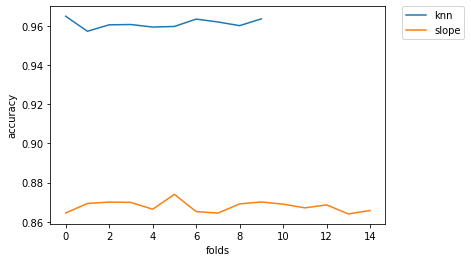

In [19]:
import matplotlib.pyplot as plt

modelPrediction = plt.plot(rmseKNN,label='knn')
#     modelPrediction = plt.plot(rmseSVD,label='svd')
#     modelPrediction = plt.plot(rmseCo,label='cluster')
modelPrediction = plt.plot(rmseSlope,label='slope')

modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)